In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [3]:
df=pd.read_csv("C:\\Users\\Tinotenda Mangarai\\Documents\\Clients\\Mahomani\\final_data.csv")

In [4]:
df.head()

,Year,Quarter,ROA,Capital,Net Capital Base,Total Assets,Total Deposits,Total Loans,Non-Performing Loans,Net Income,Deposits to Assets,Loans to Deposits,PaR>30 days,Cost to Income,Prudential Liquidity Ratio,Operating Expenses Ratio
0,2010,Q1,-15.77%,"53,375,298.67","105,291,187.76","141,787,199.16","6,460,388","34,683,998","4,047,268.89","-22,364,540.33",4.56%,536.87%,11.67%,206.81%,67.47%,130.78%
1,2010,Q2,28.20%,"132,162,149.32","134,910,423.26","289,492,233.96","88,341,413.35","40,873,299.40","2,989,500","81,644,047.27",30.52%,46.27%,7.31%,36.27%,89.05%,112.77%
2,2010,Q3,35.09%,"97,923,243.90","113,752,584.58","181,346,693.76","5,931,495.12","7,496,055.39","782,208.16","63,641,419.30",3.27%,126.38%,10.43%,30.23%,95.87%,342.36%
3,2010,Q4,-20.79%,"94,413,079.00","96,844,156.00","116,172,913.41","4,295,446.00","67,459,940.00","3,096,998.24","-24,149,773.98",3.70%,1570.50%,4.59%,241.30%,89.99%,57.51%
4,2011,Q1,-13.27%,"20,652,957.17","28,877,663.43","38,452,686.82","2,804,121","12,599,842","1,384,458.76","-5,103,667",7.29%,449.33%,10.99%,262.65%,66.61%,60.64%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        52 non-null     int64 
 1   Quarter                     52 non-null     object
 2   ROA                         52 non-null     object
 3   Capital                     52 non-null     object
 4   Net Capital Base            52 non-null     object
 5   Total Assets                52 non-null     object
 6   Total Deposits              52 non-null     object
 7   Total Loans                 52 non-null     object
 8   Non-Performing Loans        52 non-null     object
 9   Net Income                  50 non-null     object
 10  Deposits to Assets          44 non-null     object
 11  Loans to Deposits           44 non-null     object
 12  PaR>30 days                 44 non-null     object
 13  Cost to Income              44 non-null     object
 

In [6]:
df.shape

(52, 16)

In [7]:
# Remove commas from all columns
df = df.replace(",", "", regex=True)

In [8]:
df.head()

,Year,Quarter,ROA,Capital,Net Capital Base,Total Assets,Total Deposits,Total Loans,Non-Performing Loans,Net Income,Deposits to Assets,Loans to Deposits,PaR>30 days,Cost to Income,Prudential Liquidity Ratio,Operating Expenses Ratio
0,2010,Q1,-15.77%,53375298.67,105291187.76,141787199.16,6460388,34683998,4047268.89,-22364540.33,4.56%,536.87%,11.67%,206.81%,67.47%,130.78%
1,2010,Q2,28.20%,132162149.32,134910423.26,289492233.96,88341413.35,40873299.40,2989500,81644047.27,30.52%,46.27%,7.31%,36.27%,89.05%,112.77%
2,2010,Q3,35.09%,97923243.90,113752584.58,181346693.76,5931495.12,7496055.39,782208.16,63641419.30,3.27%,126.38%,10.43%,30.23%,95.87%,342.36%
3,2010,Q4,-20.79%,94413079.00,96844156.00,116172913.41,4295446.00,67459940.00,3096998.24,-24149773.98,3.70%,1570.50%,4.59%,241.30%,89.99%,57.51%
4,2011,Q1,-13.27%,20652957.17,28877663.43,38452686.82,2804121,12599842,1384458.76,-5103667,7.29%,449.33%,10.99%,262.65%,66.61%,60.64%


In [9]:
# removing percentages 
# List of columns to remove '%' symbol
columns_to_process = ['ROA', 'Deposits to Assets', 'Loans to Deposits', 'PaR>30 days',
                      'Cost to Income ', 'Prudential Liquidity Ratio', 'Operating Expenses Ratio']

# Remove '%' symbol and convert to numeric values
for column in columns_to_process:
    df[column] = df[column].str.replace('%', '').astype(float)

In [10]:
# changing data types 
columns_to_convert = ['ROA', 'Capital ', 'Net Capital Base', 'Total Assets', 'Total Deposits', 'Total Loans', 'Non-Performing Loans', 'Net Income ']

df[columns_to_convert] = df[columns_to_convert].astype(float)

# year to a numeric variable
df['Year'] = df["Year"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        52 non-null     int32  
 1   Quarter                     52 non-null     object 
 2   ROA                         52 non-null     float64
 3   Capital                     52 non-null     float64
 4   Net Capital Base            52 non-null     float64
 5   Total Assets                52 non-null     float64
 6   Total Deposits              52 non-null     float64
 7   Total Loans                 52 non-null     float64
 8   Non-Performing Loans        52 non-null     float64
 9   Net Income                  50 non-null     float64
 10  Deposits to Assets          44 non-null     float64
 11  Loans to Deposits           44 non-null     float64
 12  PaR>30 days                 44 non-null     float64
 13  Cost to Income              44 non-nu

In [12]:
# checking for na values 
df.isna().sum()

Year                           0
Quarter                        0
ROA                            0
Capital                        0
Net Capital Base               0
Total Assets                   0
Total Deposits                 0
Total Loans                    0
Non-Performing Loans           0
Net Income                     2
Deposits to Assets             8
Loans to Deposits              8
PaR>30 days                    8
Cost to Income                 8
Prudential Liquidity Ratio     8
Operating Expenses Ratio      16
dtype: int64

In [13]:
# Calculate column average
net_average = df["Net Income "].mean()

# Replace missing values with column average
df["Net Income "].fillna(net_average, inplace=True)

# Calculate column average
dep_average = df["Deposits to Assets"].mean()

# Replace missing values with column average
df["Deposits to Assets"].fillna(dep_average, inplace=True)

loans_average = df["Loans to Deposits"].mean()

# Replace missing values with column average
df["Loans to Deposits"].fillna(loans_average, inplace=True)

par_average = df["PaR>30 days"].mean()

# Replace missing values with column average
df["PaR>30 days"].fillna(par_average, inplace=True)

costo_average = df["Cost to Income "].mean()

# Replace missing values with column average
df["Cost to Income "].fillna(costo_average, inplace=True)

prud_average = df["Prudential Liquidity Ratio"].mean()

# Replace missing values with column average
df["Prudential Liquidity Ratio"].fillna(prud_average, inplace=True)

op_average = df["Operating Expenses Ratio"].mean()

# Replace missing values with column average
df["Operating Expenses Ratio"].fillna(op_average, inplace=True)

In [14]:
df.isna().sum()

Year                          0
Quarter                       0
ROA                           0
Capital                       0
Net Capital Base              0
Total Assets                  0
Total Deposits                0
Total Loans                   0
Non-Performing Loans          0
Net Income                    0
Deposits to Assets            0
Loans to Deposits             0
PaR>30 days                   0
Cost to Income                0
Prudential Liquidity Ratio    0
Operating Expenses Ratio      0
dtype: int64

In [15]:
# Checking for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the duplicates
print("Number of duplicates:", num_duplicates)
print("Duplicate rows:")
print(df[duplicates])

Number of duplicates: 0
Duplicate rows:
Empty DataFrame
Columns: [Year, Quarter, ROA, Capital , Net Capital Base, Total Assets, Total Deposits, Total Loans, Non-Performing Loans, Net Income , Deposits to Assets, Loans to Deposits, PaR>30 days, Cost to Income , Prudential Liquidity Ratio, Operating Expenses Ratio]
Index: []


In [16]:
# Normalising the data using z-scores
from sklearn.preprocessing import StandardScaler

# Select the columns to normalize
columns_to_normalize = ['Capital ', 'Net Capital Base', 'Total Assets', 'Total Deposits', 'Total Loans', 'Non-Performing Loans', 'Net Income ']

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [17]:
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to encode
categorical_columns = ['Quarter']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
for column in categorical_columns:
    df['Quarter'] = label_encoder.fit_transform(df[column])

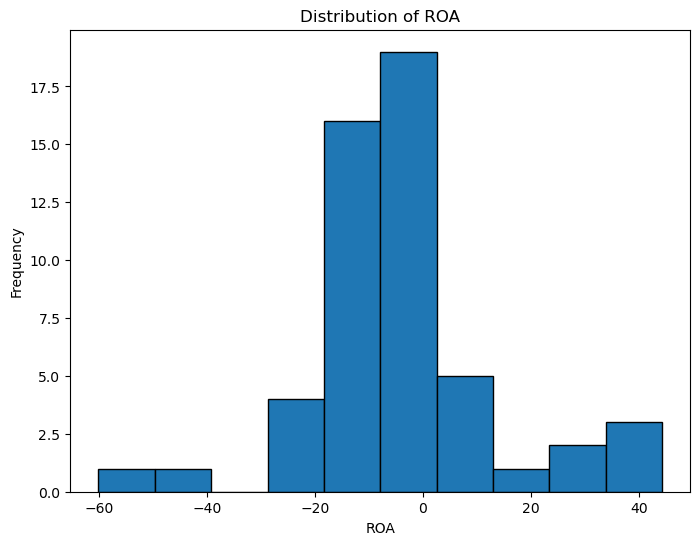

In [18]:
# Histogram of ROA (Return on Assets)
plt.figure(figsize=(8, 6))
plt.hist(df['ROA'], bins=10, edgecolor='k')
plt.xlabel('ROA')
plt.ylabel('Frequency')
plt.title('Distribution of ROA')
plt.show()

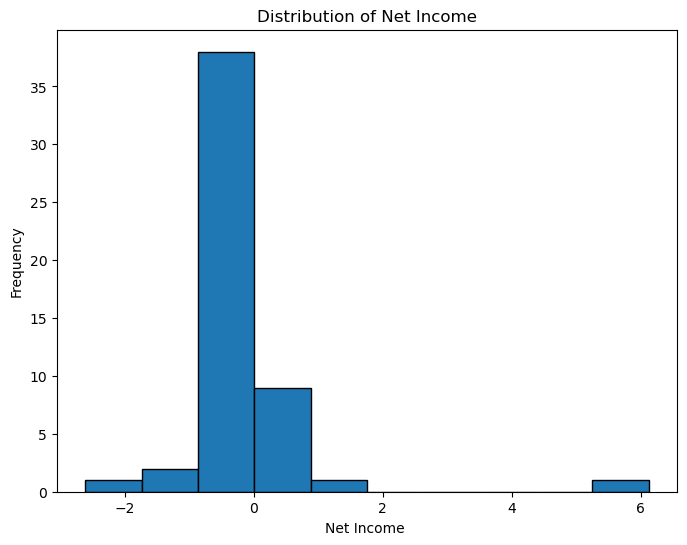

In [19]:
# Histogram of ROA (Return on Assets)
plt.figure(figsize=(8, 6))
plt.hist(df['Net Income '], bins=10, edgecolor='k')
plt.xlabel('Net Income ')
plt.ylabel('Frequency')
plt.title('Distribution of Net Income')
plt.show()

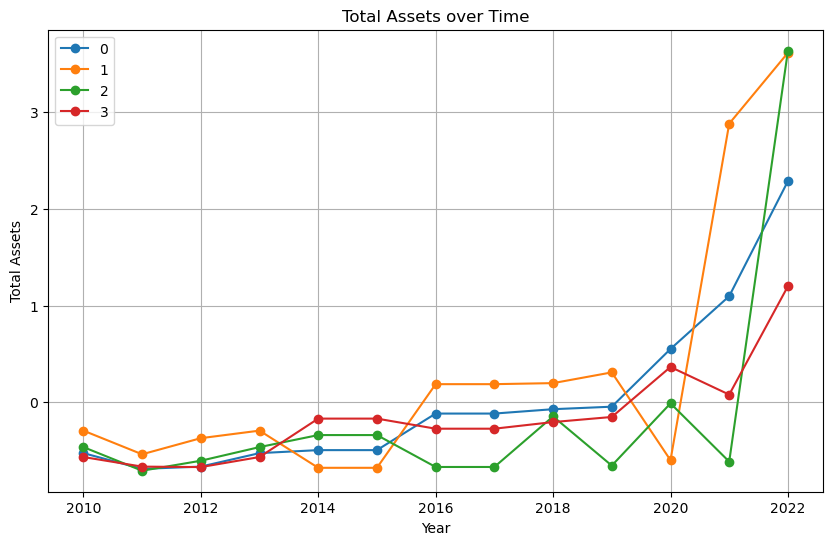

In [20]:
# Line plot of Total Assets over time with different colors for each quarter
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Plot each quarter separately with different colors
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Total Assets'], marker='o', label=quarter)

plt.xlabel('Year')
plt.ylabel('Total Assets')
plt.title('Total Assets over Time')
plt.legend()
plt.grid(True)
plt.show()

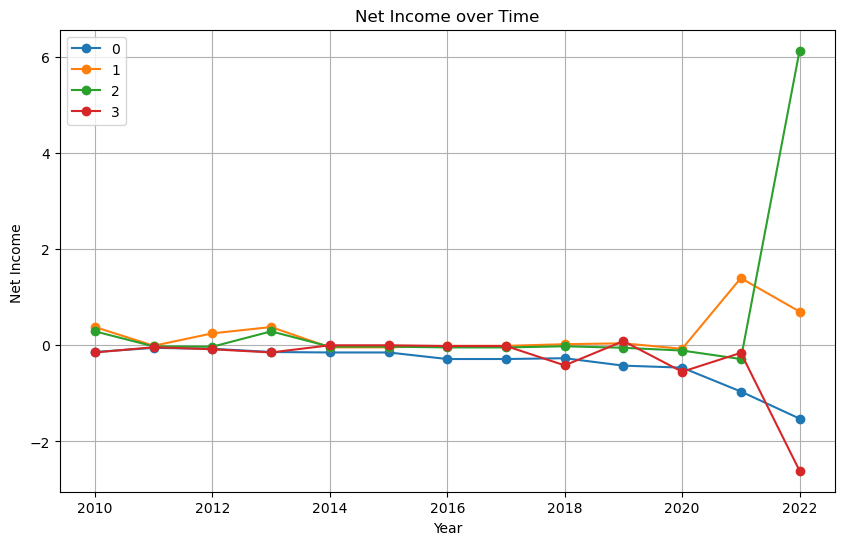

In [21]:
# Line plot of Net Income over time with different colors for each quarter
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Plot each quarter separately with different colors
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Net Income '], marker='o', label=quarter)

plt.xlabel('Year')
plt.ylabel('Net Income ')
plt.title('Net Income over Time')
plt.legend()
plt.grid(True)
plt.show()

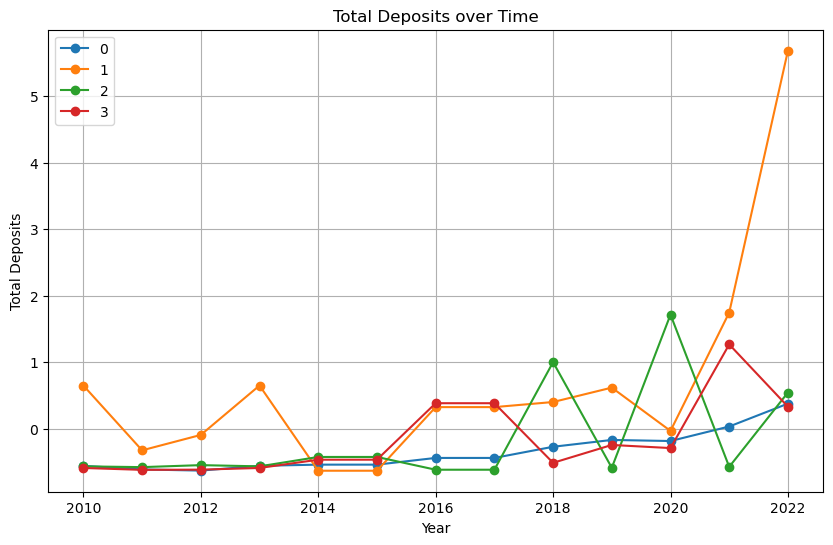

In [22]:
# Line plot of Total Deposts over time with different colors for each quarter
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Plot each quarter separately with different colors
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Total Deposits'], marker='o', label=quarter)

plt.xlabel('Year')
plt.ylabel('Total Deposits')
plt.title('Total Deposits over Time')
plt.legend()
plt.grid(True)
plt.show()

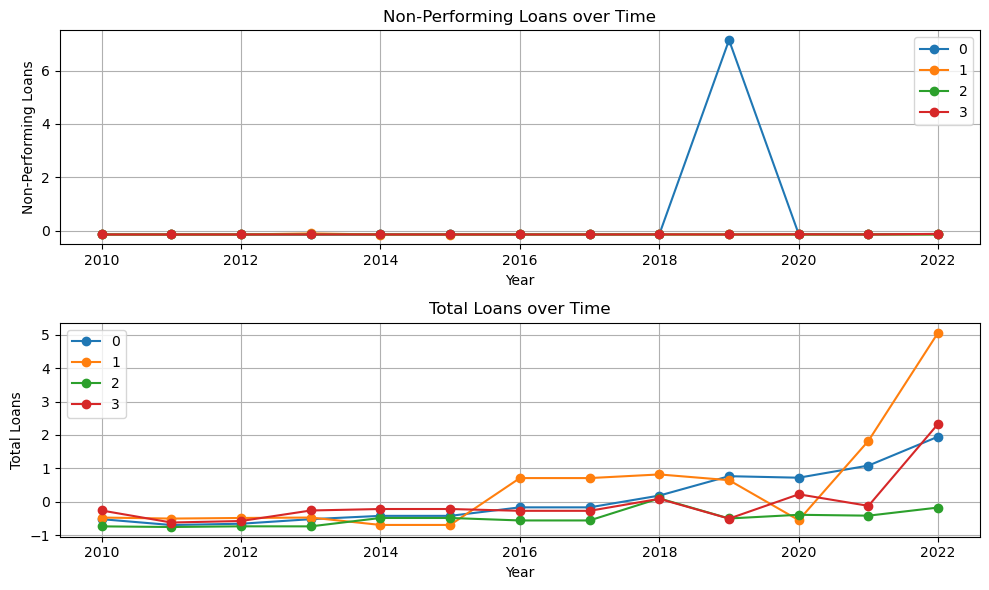

In [23]:
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Line plot for Total Non Performing Loans 
plt.subplot(2, 1, 1)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Non-Performing Loans'], marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Non-Performing Loans')
plt.title('Non-Performing Loans over Time')
plt.legend()
plt.grid(True)

# Line plot for Total Loans
plt.subplot(2, 1, 2)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Total Loans'], marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Total Loans')
plt.title('Total Loans over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

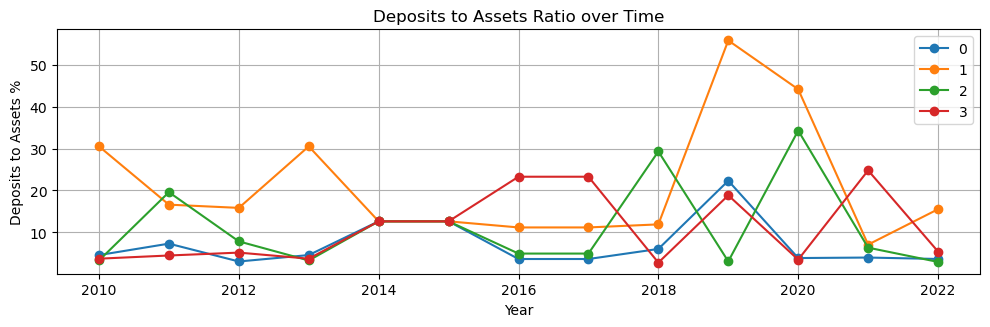

In [24]:
plt.figure(figsize=(10, 9))

# Get unique quarters
quarters = df['Quarter'].unique()

# Line plot for Deposits to Assets ratio
plt.subplot(3, 1, 1)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    deposits_to_assets = quarter_data['Deposits to Assets']
    plt.plot(quarter_data['Year'], deposits_to_assets, marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Deposits to Assets %')
plt.title('Deposits to Assets Ratio over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


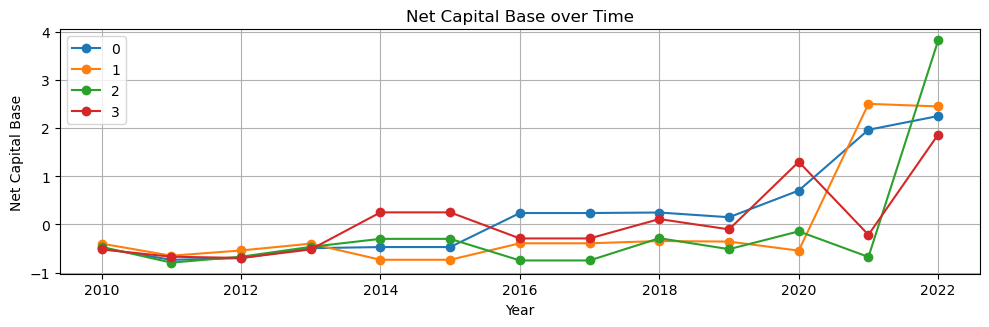

In [25]:
# Net capital base 

plt.figure(figsize=(10, 9))

# Get unique quarters
quarters = df['Quarter'].unique()

# Line plot for Deposits to Assets ratio
plt.subplot(3, 1, 1)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    net_capital_base = quarter_data['Net Capital Base']
    plt.plot(quarter_data['Year'], net_capital_base, marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Net Capital Base')
plt.title('Net Capital Base over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


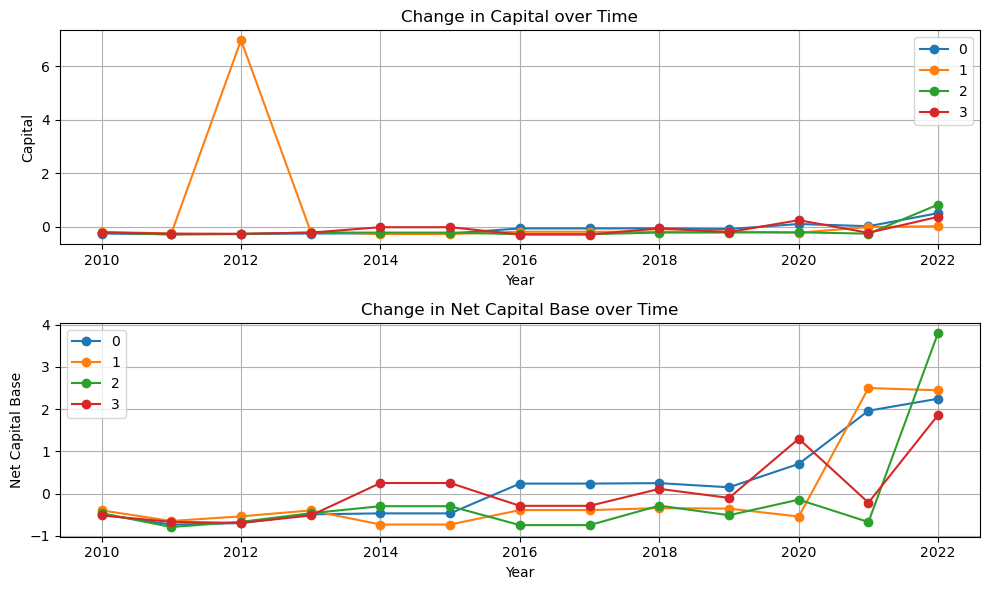

In [26]:
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Line plot for Capital 
plt.subplot(2, 1, 1)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Capital '], marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Capital')
plt.title('Change in Capital over Time')
plt.legend()
plt.grid(True)

# Line plot for Net Capital Base
plt.subplot(2, 1, 2)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Net Capital Base'], marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Net Capital Base')
plt.title('Change in Net Capital Base over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

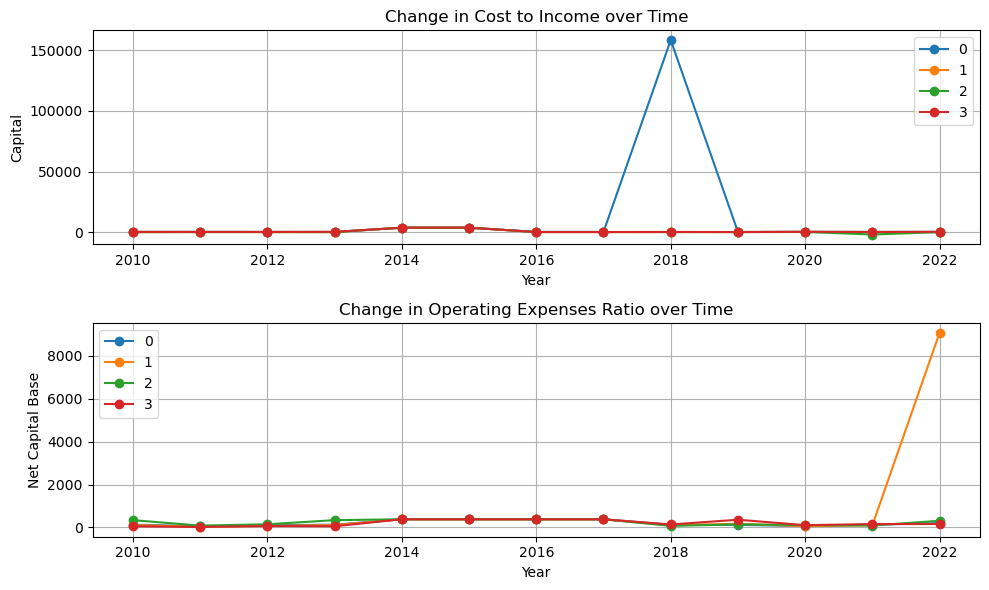

In [27]:
# Measures of efficiency and productoin
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Line plot for Capital 
plt.subplot(2, 1, 1)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Cost to Income '], marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Capital')
plt.title('Change in Cost to Income over Time')
plt.legend()
plt.grid(True)

# Line plot for Net Capital Base
plt.subplot(2, 1, 2)
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Operating Expenses Ratio'], marker='o', label=quarter)
plt.xlabel('Year')
plt.ylabel('Net Capital Base')
plt.title('Change in Operating Expenses Ratio over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

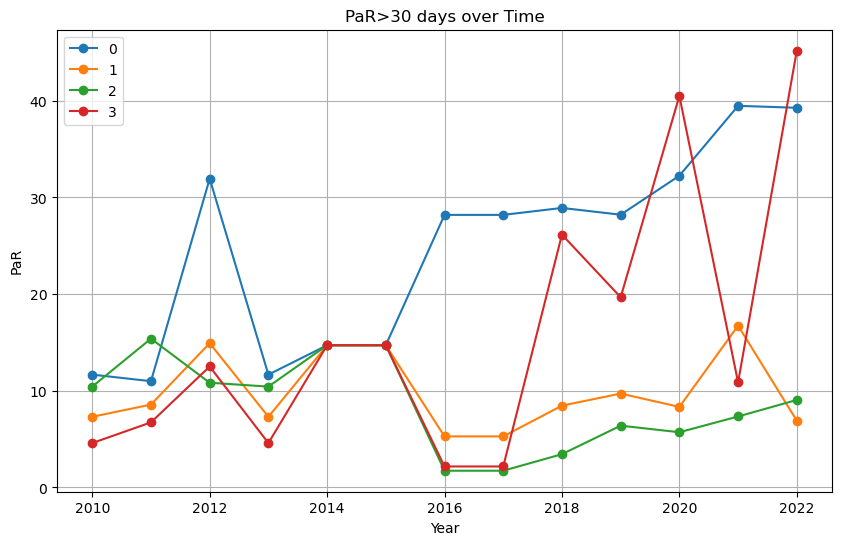

In [28]:
# Line plot of PaR>30 over time with different colors for each quarter
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Plot each quarter separately with different colors
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['PaR>30 days'], marker='o', label=quarter)

plt.xlabel('Year')
plt.ylabel('PaR')
plt.title('PaR>30 days over Time')
plt.legend()
plt.grid(True)
plt.show()

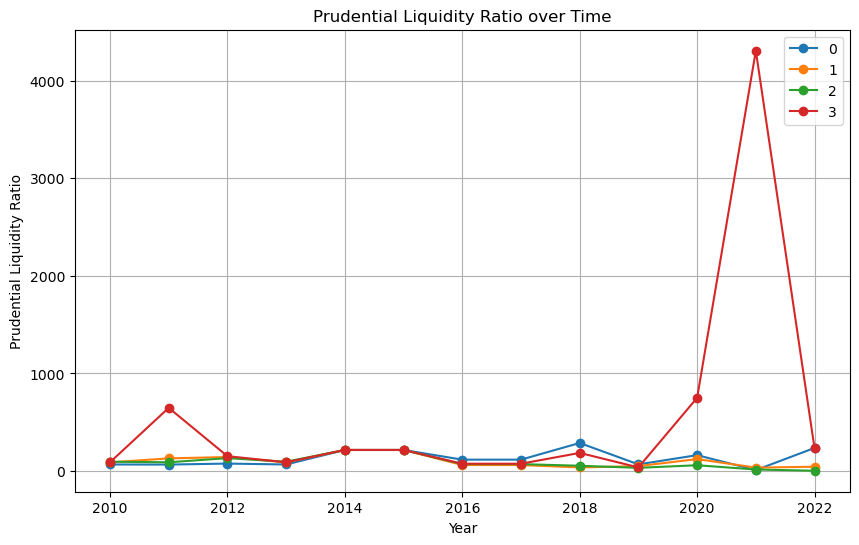

In [29]:
# Line plot of Prudential Liquidity Ratio over time with different colors for each quarter
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Plot each quarter separately with different colors
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['Prudential Liquidity Ratio'], marker='o', label=quarter)

plt.xlabel('Year')
plt.ylabel('Prudential Liquidity Ratio')
plt.title('Prudential Liquidity Ratio over Time')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        52 non-null     int32  
 1   Quarter                     52 non-null     int32  
 2   ROA                         52 non-null     float64
 3   Capital                     52 non-null     float64
 4   Net Capital Base            52 non-null     float64
 5   Total Assets                52 non-null     float64
 6   Total Deposits              52 non-null     float64
 7   Total Loans                 52 non-null     float64
 8   Non-Performing Loans        52 non-null     float64
 9   Net Income                  52 non-null     float64
 10  Deposits to Assets          52 non-null     float64
 11  Loans to Deposits           52 non-null     float64
 12  PaR>30 days                 52 non-null     float64
 13  Cost to Income              52 non-nu

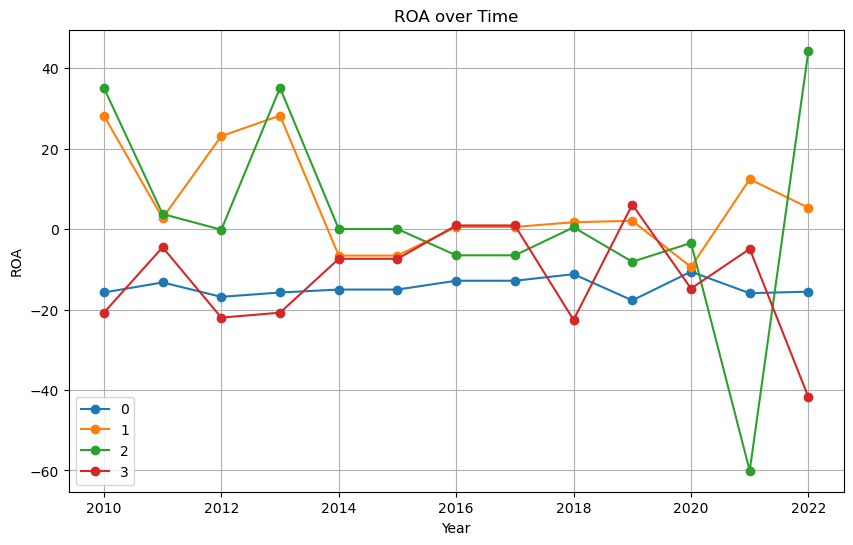

In [31]:
# Line plot of ROA over time with different colors for each quarter
plt.figure(figsize=(10, 6))

# Get unique quarters
quarters = df['Quarter'].unique()

# Plot each quarter separately with different colors
for quarter in quarters:
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Year'], quarter_data['ROA'], marker='o', label=quarter)

plt.xlabel('Year')
plt.ylabel('ROA')
plt.title('ROA over Time')
plt.legend()
plt.grid(True)
plt.show()

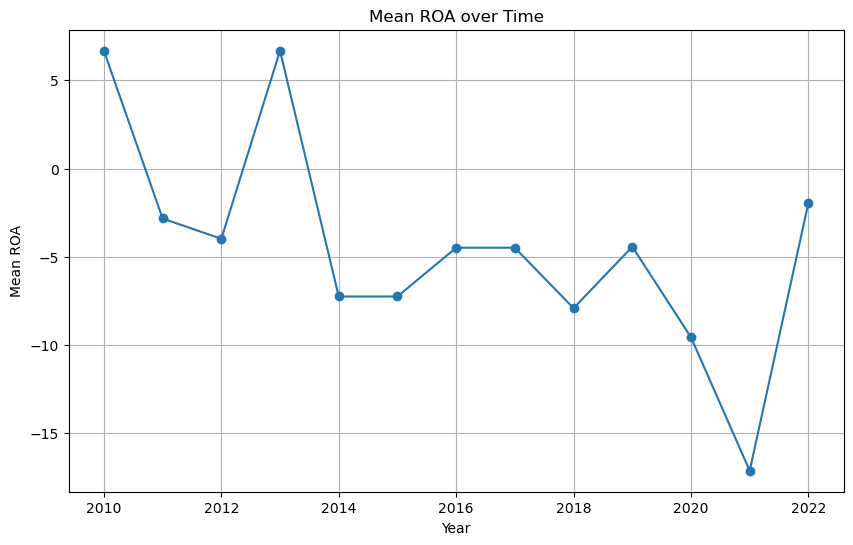

In [32]:
plt.figure(figsize=(10, 6))

# Calculate mean ROA for each year
mean_roa = df.groupby('Year')['ROA'].mean()

# Plot mean ROA over time
plt.plot(mean_roa.index, mean_roa, marker='o')

plt.xlabel('Year')
plt.ylabel('Mean ROA')
plt.title('Mean ROA over Time')
plt.grid(True)
plt.show()

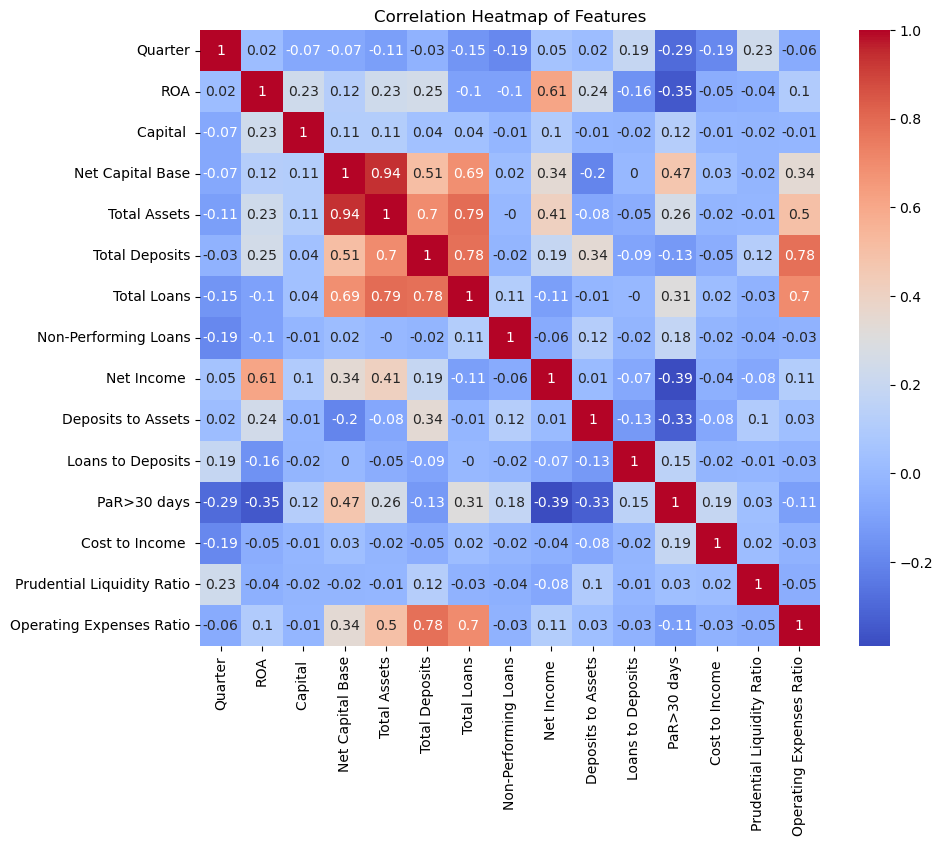

In [33]:
# Remove 'Year' column from the dataframe
df_without_year = df.drop('Year', axis=1)

# Correlation matrix without 'Year' column
corr_matrix = round(df_without_year.corr(), 2)

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [34]:
# Find feature pairs with high correlation
high_corr_threshold = 0.7  # Set the correlation threshold as desired
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) >= high_corr_threshold:
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            high_corr_pairs.append((feature_i, feature_j, corr))

# Print feature pairs with high correlation
if high_corr_pairs:
    print("Feature pairs with high correlation:")
    for pair in high_corr_pairs:
        feature_i, feature_j, corr = pair
        print(f"{feature_i} - {feature_j}: {corr}")
else:
    print("No feature pairs with high correlation.")

Feature pairs with high correlation:
Net Capital Base - Total Assets: 0.94
Total Assets - Total Deposits: 0.7
Total Assets - Total Loans: 0.79
Total Deposits - Total Loans: 0.78
Total Deposits - Operating Expenses Ratio: 0.78
Total Loans - Operating Expenses Ratio: 0.7


In [35]:
# Find feature pairs with low correlation
low_corr_threshold = 0.15  # Set the correlation threshold as desired
low_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) <= low_corr_threshold:
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            low_corr_pairs.append((feature_i, feature_j, corr))

# Print feature pairs with low correlation
if low_corr_pairs:
    print("Feature pairs with low correlation:")
    for pair in low_corr_pairs:
        feature_i, feature_j, corr = pair
        print(f"{feature_i} - {feature_j}: {corr}")
else:
    print("No feature pairs with low correlation.")

Feature pairs with low correlation:
Quarter - ROA: 0.02
Quarter - Capital : -0.07
Quarter - Net Capital Base: -0.07
Quarter - Total Assets: -0.11
Quarter - Total Deposits: -0.03
Quarter - Total Loans: -0.15
Quarter - Net Income : 0.05
Quarter - Deposits to Assets: 0.02
Quarter - Operating Expenses Ratio: -0.06
ROA - Net Capital Base: 0.12
ROA - Total Loans: -0.1
ROA - Non-Performing Loans: -0.1
ROA - Cost to Income : -0.05
ROA - Prudential Liquidity Ratio: -0.04
ROA - Operating Expenses Ratio: 0.1
Capital  - Net Capital Base: 0.11
Capital  - Total Assets: 0.11
Capital  - Total Deposits: 0.04
Capital  - Total Loans: 0.04
Capital  - Non-Performing Loans: -0.01
Capital  - Net Income : 0.1
Capital  - Deposits to Assets: -0.01
Capital  - Loans to Deposits: -0.02
Capital  - PaR>30 days: 0.12
Capital  - Cost to Income : -0.01
Capital  - Prudential Liquidity Ratio: -0.02
Capital  - Operating Expenses Ratio: -0.01
Net Capital Base - Non-Performing Loans: 0.02
Net Capital Base - Loans to Deposit

# Feature Selection 

In [36]:
# Create a new DataFrame without the "ROA" column
features = df.drop("ROA", axis=1)
target = df['ROA']

In [37]:
# Calculating mutual information scores 
mi_scores = mutual_info_regression(features, target)

Text(0.5, 0, 'Mutual Information Score')

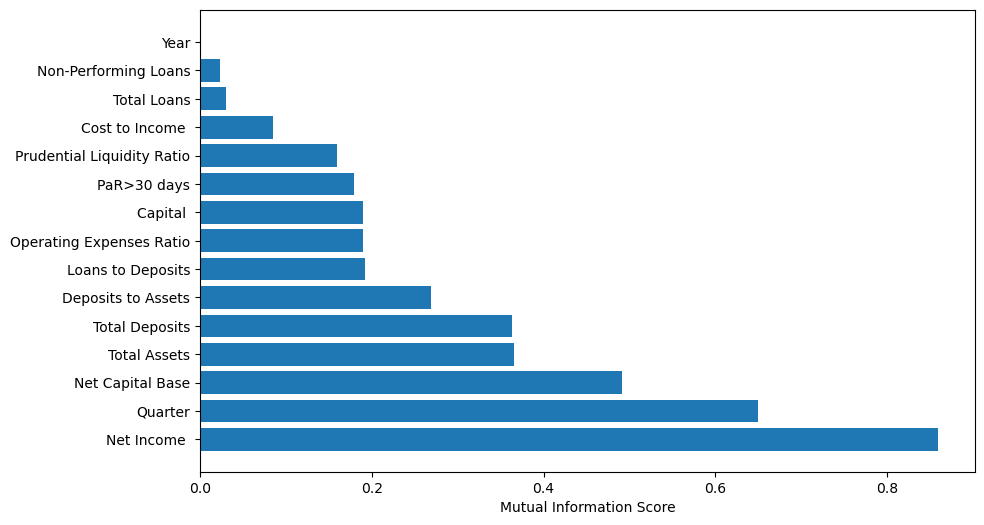

In [38]:
# Create a DataFrame with feature names and mutual information scores
mi_df = pd.DataFrame({'Feature': features.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order
mi_df = mi_df.sort_values('MI Score', ascending=False)

# Plot the mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI Score'])
plt.xlabel('Mutual Information Score')

# Baseline Model

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = features[['Net Capital Base', 'Quarter', 'Net Income ', 'Total Deposits', 'Total Assets']]
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the mean of the target variable
mean_target = y_train.mean()

# Create baseline predictions
y_pred_baseline = [mean_target] * len(y_test)

# Calculate the evaluation metrics for the baseline predictions
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

# Print the evaluation metrics for the baseline model
print("Baseline Mean Absolute Error:", mae_baseline)
print("Baseline Mean Squared Error:", mse_baseline)
print("Baseline R-squared Score:", r2_baseline)

Baseline Mean Absolute Error: 12.773170731707317
Baseline Mean Squared Error: 376.6980607863285
Baseline R-squared Score: -0.040837045008616846


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        52 non-null     int32  
 1   Quarter                     52 non-null     int32  
 2   ROA                         52 non-null     float64
 3   Capital                     52 non-null     float64
 4   Net Capital Base            52 non-null     float64
 5   Total Assets                52 non-null     float64
 6   Total Deposits              52 non-null     float64
 7   Total Loans                 52 non-null     float64
 8   Non-Performing Loans        52 non-null     float64
 9   Net Income                  52 non-null     float64
 10  Deposits to Assets          52 non-null     float64
 11  Loans to Deposits           52 non-null     float64
 12  PaR>30 days                 52 non-null     float64
 13  Cost to Income              52 non-nu

# Developing and Training the ANN algorithm 

In [41]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X = features[['Net Capital Base', 'Quarter', 'Net Income ', 'Total Deposits', 'Total Assets']]
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an ANN model with default parameters
ann_model = MLPRegressor(random_state=42)

# Fit the model to the training data
ann_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ann_model.predict(X_test)

# Calculate the evaluation metrics for the default model
mae_default = mean_absolute_error(y_test, y_pred)
mse_default = mean_squared_error(y_test, y_pred)
r2_default = r2_score(y_test, y_pred)

# Print the evaluation metrics for the default model
print("Default ANN Mean Absolute Error:", mae_default)
print("Default ANN Mean Squared Error:", mse_default)
print("Default ANN R-squared Score:", r2_default)

Default ANN Mean Absolute Error: 8.984634722979528
Default ANN Mean Squared Error: 160.58177707757895
Default ANN R-squared Score: 0.5563038949901445


C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Hyperparameter tuning

In [28]:
# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 400, 600]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(ann_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred_tuned = best_model.predict(X_test)

# Calculate the evaluation metrics for the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Print the evaluation metrics and best parameters for the tuned model
print("Tuned ANN Mean Absolute Error:", mae_tuned)
print("Tuned ANN Mean Squared Error:", mse_tuned)
print("Tuned ANN R-squared Score:", r2_tuned)
print("Best Parameters:", best_params)


C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

Tuned ANN Mean Absolute Error: 4.620024140245912
Tuned ANN Mean Squared Error: 80.94221531251367
Tuned ANN R-squared Score: 0.7763522965144355
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'sgd'}


C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
best_model_architecture = best_model.hidden_layer_sizes
activation = best_model.activation
solver = best_model.solver
alpha = best_model.alpha
learning_rate = best_model.learning_rate
max_iter = best_model.max_iter

print("Best Model Architecture:", best_model_architecture)
print("Activation Function:", activation)
print("Solver:", solver)
print("Alpha:", alpha)
print("Learning Rate:", learning_rate)
print("Max Iterations:", max_iter)

Best Model Architecture: (50,)
Activation Function: tanh
Solver: sgd
Alpha: 0.01
Learning Rate: constant
Max Iterations: 400


In [31]:
# Cross Validation to avoid overfitting 
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='r2')
cv_scores

C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda Mangarai\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Tinotenda M

array([0.95339739, 0.71923571, 0.96876088, 0.48118896, 0.53185025,
       0.8177611 , 0.88158169, 0.87359309, 0.23173426, 0.85697967])

In [41]:
cv_scores.mean()
cv_scores.std()

print("The mean r-squared of the 10-fold cross validation is:", round(cv_scores.mean(),2),
      
     "with a standard deviation of:", round(cv_scores.std(),2))


The mean r-squared of the 10-fold cross validation is: 0.73 with a standard deviation of: 0.23


Text(0.5, 0, 'Mutual Information Score')

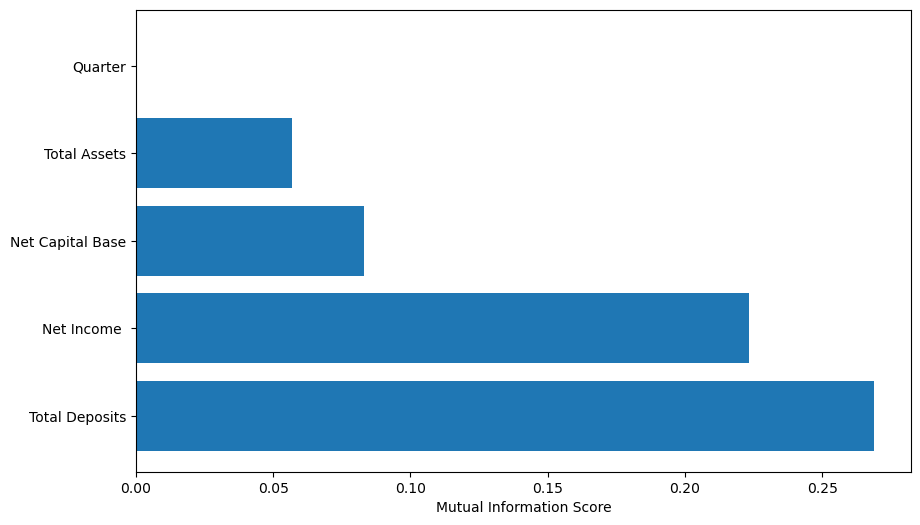

In [42]:
# Calculating mutual information scores 
mi_scores = mutual_info_regression(X_test, y_pred)

# Create a DataFrame with feature names and mutual information scores
mi_df = pd.DataFrame({'Feature': X_test.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order
mi_df = mi_df.sort_values('MI Score', ascending=False)

# Plot the mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI Score'])
plt.xlabel('Mutual Information Score')